In [1]:
#General Libraries:
import pandas as pd
import numpy as np
import os

#Web Scrapping Libraries:
from urllib.request import urlopen
from bs4 import BeautifulSoup

#Error Handling 
import sys
import traceback
import datetime

#Visualization
import matplotlib.pyplot as plt
import ipywidgets as widgets

#Text Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statistics import mean 

#Seeting up folder path:

os.chdir('C:/Users/mohdn/Desktop/Nadeem/DataSets/Reviews_Tool/')

%matplotlib inline

In [ ]:
#Creating the dataframe to store the scrapped values

dataframe_comp=pd.DataFrame()
log = pd.DataFrame()

#Scraping Code:
#e='Exception message : HTTP Error 503: Service Unavailable'
while input('Do you want to scrap : ') == 'Yes':
    i=1
    e='Exception message : HTTP Error 503: Service Unavailable'
    
    country = input('''Choose the country from the list :
                    1 - US,
                    2 - UK,
                    3 - India,
                    4 - Canada,
                    5 - Australia
                    ''')

    product = input('Enter the product id :')
    page_count = input('''Enter the amount of pages to scrap
                        Minimum - 1
                        Maximum - 500
                        ''')
    
    while (i <=int(page_count)  and e==('Exception message : HTTP Error 503: Service Unavailable')):
        try:

            currentDT = datetime.datetime.now()
            ltime = str(currentDT.strftime("%Y-%m-%d %H:%M:%S"))
            ltimeandi = pd.DataFrame({'Iteration':i, 'Time':ltime},index=[0])
            log = log.append(ltimeandi,ignore_index=True)
            print(i)
            
            if country == '1':
                html = 'https://www.amazon.com/All-new-Echo-Dot-3rd-Gen/product-reviews/{}/ref=cm_cr_arp_d_paging_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(product,i,i)
                #country ='US'
            if country == '2':
                #https://www.amazon.co.uk/Echo-Dot-3rd-Gen-Charcoal/product-reviews/B07PJV3JPR/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
                html = 'https://www.amazon.co.uk/Echo-Dot-3rd-Gen-Charcoal/product-reviews/{}/ref=cm_cr_dp_d_show_all_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(product,i,i)
                #country ='UK'
            if country == '3':
                #https://www.amazon.in/Echo-Dot-3rd-Gen-improved/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
                html = 'https://www.amazon.in/Echo-Dot-3rd-Gen-improved/product-reviews/{}/ref=cm_cr_dp_d_show_all_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(product,i,i)
                #country ='India'
            if country == '4':
                #https://www.amazon.ca/Echo-Dot-3rd-gen-Sandstone/product-reviews/B07NQ8YDJZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
                html = 'https://www.amazon.ca/Echo-Dot-3rd-gen-Sandstone/product-reviews/{}/ref=cm_cr_dp_d_show_all_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(product,i,i)
                #country ='Canada'
            if country == '5':
                html = 'https://www.amazon.com.au/All-new-Echo-Smart-speaker-Alexa/product-reviews/{}/ref=cm_cr_dp_d_show_all_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(product,i,i)
                #country =' Australia'

            html = urlopen(html)
            soup = BeautifulSoup(html,"lxml")
            html = soup.prettify('utf-8')
            names = []
            full_reviews = []
            short_review = []
            long_review = []
            dates= []
            verified_pur = []

            size = soup.find('span',attrs={'class': 'a-size-base','data-hook':"cr-filter-info-review-count"}).text.strip()
            #print(size)

            for span in soup.findAll('span',attrs={'class': 'a-profile-name'}):
                name = span.text.strip()
                names.append(name)
            names =names [2::1]

            for span in soup.findAll('span',attrs={'class': ""}):
                review = span.text.strip()
                full_reviews.append(review)
                
            short_review = full_reviews[2:-5:4]
            long_review = full_reviews[3:-4:4]
            
            
            if country == '1':
                short_review = full_reviews[2::4]
                short_review.pop()
                long_review = full_reviews[3::4]
                
            if country == '2':
                short_review = full_reviews[2::4]
                long_review = full_reviews[3::4]
                        
            for span in soup.findAll('span',attrs={'class': 'a-size-base a-color-secondary review-date'}):
                date = span.text.strip()
                dates.append(date)
            dates = dates [2::1]

            for span in soup.findAll('a',attrs={'class': "a-size-mini a-link-normal a-color-secondary",'data-hook':"format-strip"}):
                verified = span.text.strip()
                verified_pur.append(verified)

            dataframe = pd.DataFrame({'Country':country,'Name':names,'Long Reviews':long_review,'Short Reviews':short_review,'Date':dates,'Product Detail':verified_pur})
            #dataframe = pd.DataFrame({'Short Reviews':short_review})
            dataframe_comp = dataframe_comp.append(dataframe,ignore_index=True)
            i = i+1

        except BaseException as ex:
            # Get current system exception
            ex_type, ex_value, ex_traceback = sys.exc_info()

            # Extract unformatter stack traces as tuples
            trace_back = traceback.extract_tb(ex_traceback)

            # Format stacktrace
            stack_trace = list()

            for trace in trace_back:
                stack_trace.append("File : %s , Line : %d, Func.Name : %s, Message : %s" % (trace[0], trace[1], trace[2], trace[3]))

                #print("Exception type : %s " % ex_type.__name__)
                #print("Exception message : %s" %ex_value)
                #print("Stack trace : %s" %stack_trace)
            e = ("Exception message : %s" %ex_value)
    
    dataframe_comp['Country'] = dataframe_comp['Country'].map({'1': 'US', '2': 'UK','3':'India','4':'Canada','5':'Australia'})
    dataframe_comp.to_csv(r'{}_Review.csv'.format(country),index=None)

*US B07N8RPRF7 *Australia B0792KRW2J

## Combing all the files

In [2]:
#Reading the files

country_list = ['1','2','3','4','5']
i=0
alexa = pd.DataFrame()
for country in country_list:
    individual = pd.read_csv('{}_Review.csv'.format(country),encoding='latin-1')
    alexa = alexa.append(individual,ignore_index=True)
    
#Getting Color

color = []
for i in alexa['Product Detail']:
    if 'Charcoal' in str(i):
        temp_color = 'Charcoal'
    elif 'Grey' in str(i):
        temp_color = 'Heather Grey'
    elif 'Black' in str(i):
        temp_color = 'Black'
    elif 'White' in str(i):
        temp_color = 'White'
    else:
        temp_color = 'Sandstone'
    color.append(temp_color)

alexa['color'] = pd.DataFrame(color)

## Famous Echo Dot Color Country wise 

Output()

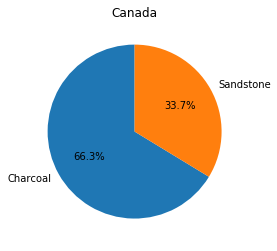

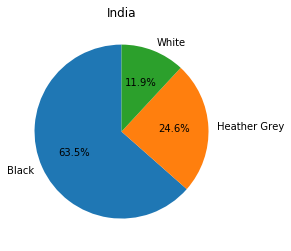

In [3]:

pie_data = pd.DataFrame(alexa.groupby(['Country','color']).size())
pie_data.reset_index(inplace=True)
pie_data.rename(columns = {0:'Total'}, inplace = True) 
pie_data['Total'] = pie_data['Total'].apply(pd.to_numeric)
#colors = ["gray", "orange", "yellow"]

filtered = pd.DataFrame()
output = widgets.Output()

dropdown_field = widgets.Dropdown(options = sorted(pie_data.Country.unique()))

def common_filtering(field):
    global filtered
    output.clear_output()

    filtered = pie_data[(pie_data.Country == field)]
    plot_pie = plt.pie(filtered['Total'], labels=filtered['color'],shadow=False, 
                       startangle=90,
                       autopct='%1.1f%%')
    plt.title(str(field))
    with output:
        display(plot_pie)

def dropdown_field_eventhandler(change):
    common_filtering(change.new)


dropdown_field.observe(dropdown_field_eventhandler, names='value')


input_widgets = widgets.HBox([dropdown_field])
display(input_widgets)

display(output)

In [4]:
import string
import re

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Cleaning the Reviews (Removing puntuations,stopwords and stemming)

In [5]:
stopwords = set(STOPWORDS)
stopwords.update(["alexa", "echo", "dot","device","amazon","product"])
ps = nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()

def clean_text(text):
    text ="".join([char for char in text if char not in string.punctuation])
    token = re.split('\W+',text)
    stop_word =  " ".join([word for word in token if word not in stopwords])
    text = "".join([ps.stem(word) for word in stop_word])
    #text = [wn.lemmatize(word) for word in stop_word]
    return text

alexa['Clean_Review'] = alexa['Long Reviews'].apply(lambda x: clean_text(x.lower()))
#alexa['Short_Clean_Review'] = alexa['Short Review'].apply(lambda x: clean_text(x.lower()))
alexa.head()

,Country,Name,Long Reviews,Short Reviews,Date,Product Detail,color,Clean_Review
0,US,Peter,Sound quality is the best I've heard on a spea...,Better than 2nd Gen! ***HERE'S HOW TO HELP WI...,"October 15, 2018",Style: Echo DotColor: Sandstone..Configuration...,Sandstone,sound quality best ive heard speaker size defi...
1,US,Frederick,I've been a happy owner of a 2nd generation Ec...,"Love the Dot and its new look, but the sound i...","October 15, 2018",Style: Echo DotColor: Heather Gray.Configurati...,Sandstone,ive happy owner 2nd generation three 2nd gener...
2,US,Leah,I had no idea I'd love Alexa so much - I wake ...,I'm in love with this little guy! Unending en...,"October 17, 2018",Style: Echo DotColor: Charcoal..Configuration:...,Charcoal,idea id love much wake morning routine ive set...
3,US,Ramona Pelham,I cannot say enough about this amazon echo dot...,So loud! So crisp!,"June 18, 2019",Style: Echo DotColor: Charcoal..Configuration:...,Charcoal,say enough wonderful loud crisp knows voice we...
4,US,Amazon Customer,I was excited when they said it had a better s...,Slightly louder but not as good as Google Home...,"October 16, 2018",Style: Echo DotColor: Charcoal..Configuration:...,Charcoal,excited said better speaker dots disappointing...


In [6]:
# Create and generate a word cloud image:
usa_text = " ".join(review for review in alexa[alexa["Country"]=="US"].Clean_Review)
print ("There are {} words in the combination of all review.".format(len(usa_text)))

uk_text =" ".join(review for review in alexa[alexa["Country"]=="UK"].Clean_Review)
print ("There are {} words in the combination of all review.".format(len(uk_text)))

canada_text = " ".join(review for review in alexa[alexa["Country"]=="Canada"].Clean_Review)
print ("There are {} words in the combination of all review.".format(len(canada_text )))

india_text = " ".join(review for review in alexa[alexa["Country"]=="India"].Clean_Review)
print ("There are {} words in the combination of all review.".format(len(india_text)))

aus_text = " ".join(review for review in alexa[alexa["Country"]=="Australia"].Clean_Review)
print ("There are {} words in the combination of all review.".format(len(aus_text )))

There are 648445 words in the combination of all review.
There are 455421 words in the combination of all review.
There are 266670 words in the combination of all review.
There are 224806 words in the combination of all review.
There are 31862 words in the combination of all review.


In [ ]:
mask = np.array(Image.open("usa2.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
mask = np.array(Image.open("uk1.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(uk_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
mask = np.array(Image.open("can.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(canada_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
mask = np.array(Image.open("india.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(india_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
mask = np.array(Image.open("aus.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(aus_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

Output()

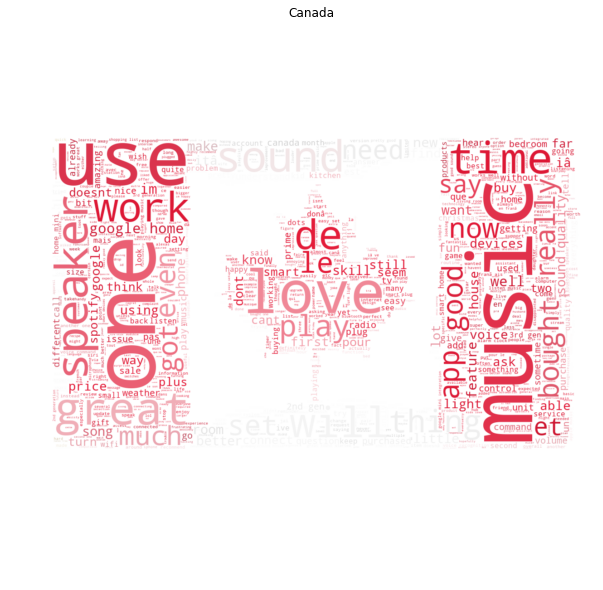

In [7]:
filtered = pd.DataFrame()
output = widgets.Output()

dropdown_field = widgets.Dropdown(options = sorted(alexa.Country.unique()))

def common_filtering(field):
    global filtered
    output.clear_output()


    filtered = " ".join(review for review in alexa[alexa["Country"]==field].Clean_Review)
    
    if field == 'Canada':
        mask = np.array(Image.open("can.png"))
        
        wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(filtered)

        # create coloring from image
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=[20,10])
        plot_pie = plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        
    elif field == 'India':
        mask = np.array(Image.open("india.png"))
        
        wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(filtered)

        # create coloring from image
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=[20,10])
        plot_pie = plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        
    elif field == 'US':
        mask = np.array(Image.open("usa.png"))
        
        wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(filtered)

        # create coloring from image
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=[10,7])
        plot_pie = plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        
    elif field == 'UK':
        mask = np.array(Image.open("uk.png"))
        
        wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(filtered)

        # create coloring from image
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=[10,7])
        plot_pie = plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        
    elif field == 'Australia':
        mask = np.array(Image.open("aus.png"))
        
        wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(filtered)

        # create coloring from image
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=[20,10])
        plot_pie = plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        
    
    
    plt.title(str(field))
    with output:
        display(plot_pie)

def dropdown_field_eventhandler(change):
    common_filtering(change.new)


dropdown_field.observe(dropdown_field_eventhandler, names='value')


input_widgets = widgets.HBox([dropdown_field])
display(input_widgets)

display(output)